In [ ]:
# use the .mat structure
import os
multisession_mat_file = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/multi_session_mat/combined_new_old2.mat")
multi_session_data = BCI_analysis.io_matlab.read_multisession_mat(multisession_mat_file)

# more extraction - low priority

In [1]:
import BCI_analysis
import pandas as pd

No module named 'cellpose'
cannot use anatomical mode, but otherwise suite2p will run normally


In [307]:
# write a script to extract the motion energy of the pixels inside the nose-jaw-eye delineated rectangle - to include whisker pad but exclude moving lickport

# regression

In [339]:
#Import necessary libraries - should work mostly from BCI_analysis + matplotlib + numpy
from BCI_analysis.pipeline import pipeline_regression
import importlib
importlib.reload(pipeline_regression)
import os
import numpy as np

In [421]:
# define base directories, if necessary
# define subject/FOV/session/
importlib.reload(BCI_analysis.pipeline_align)
multisession_mat_file = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/multi_session_mat/combined_new_old2.mat")
dlc_base_dir = os.path.abspath("/home/jupyter/bucket/Data/Behavior_videos/DLC_output/Bergamo-2P-Photostim/")
bpod_path = os.path.abspath("/home/jupyter/bucket/Data/Behavior/BCI_exported/Bergamo-2P-Photostim/")
suite2p_path = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/")
sessionwise_data_path = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/sessionwise_tba/")
aligned_data_path = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/data_aligned/")
plt_save_path = os.path.abspath("/home/jupyter/Plots/")

mouse = "BCI_26"
FOV = "FOV_04"
camera = "side"
session = "041022"


mouse = "BCI_29"
FOV = "FOV_02"
camera = "side"
session = "042722"

In [341]:
cn

18

In [422]:
# match calcium imaging frames with DLC frames, extract all data in a nice structure
# it doesn't have to have the actual calcium traces, the frame indices are enough, since we'll select the calcium traces in a next step, since probably this cell will be the slowest
# should have the option for averaging/std calculation on variable windows, then downsampling
# should have the option for excluding post-reward activity
dict_aligned = BCI_analysis.pipeline_align.get_aligned_data(suite2p_path, 
                                                            dlc_base_dir, 
                                                            bpod_path, 
                                                            sessionwise_data_path, 
                                                            aligned_data_path, 
                                                            mouse=mouse, 
                                                            FOV=FOV, 
                                                            camera=camera, 
                                                            session=session, 
                                                            sampling='down', 
                                                            overwrite=False)
print(dict_aligned.keys())
DLC_aligned = pd.DataFrame.from_dict(dict_aligned['DLC_aligned'])
F = np.concatenate(dict_aligned['F_aligned'], axis=1)

Aligned data not found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_29/042722-dict_aligned-downsampled.npy, saving
Since max_frames is all, this function will return a list of F trialwise as all trials have different lengths


141it [01:11,  1.98it/s]


dict_keys(['F_aligned', 'DLC_aligned', 'dff_aligned', 'lick_times_aligned', 'reward_times_aligned', 'trial_times_aligned', 'cn', 'trials_taken'])


In [88]:
# to do 
# add velocity, convolve with calcium kinetics
# change subject to BCI29 - session with nice learning

In [434]:
for k in DLC_aligned.keys():
    if 'likelihood'in k or 'eye' in k[0].lower():
        DLC_aligned.pop(k)
for k in DLC_aligned.keys():
    if 'lickport' in k[0].lower() or 'pole' in k[0].lower():
        DLC_aligned.pop(k)

In [435]:
DLC_aligned["Lickport"][:500].plot()

KeyError: 'Lickport'

In [436]:
scores, beta, intercept = pipeline_regression.linear_regression(F, DLC_aligned)

Calculating regression fit for 250 neurons, May take time


100%|██████████| 250/250 [00:05<00:00, 42.94it/s]


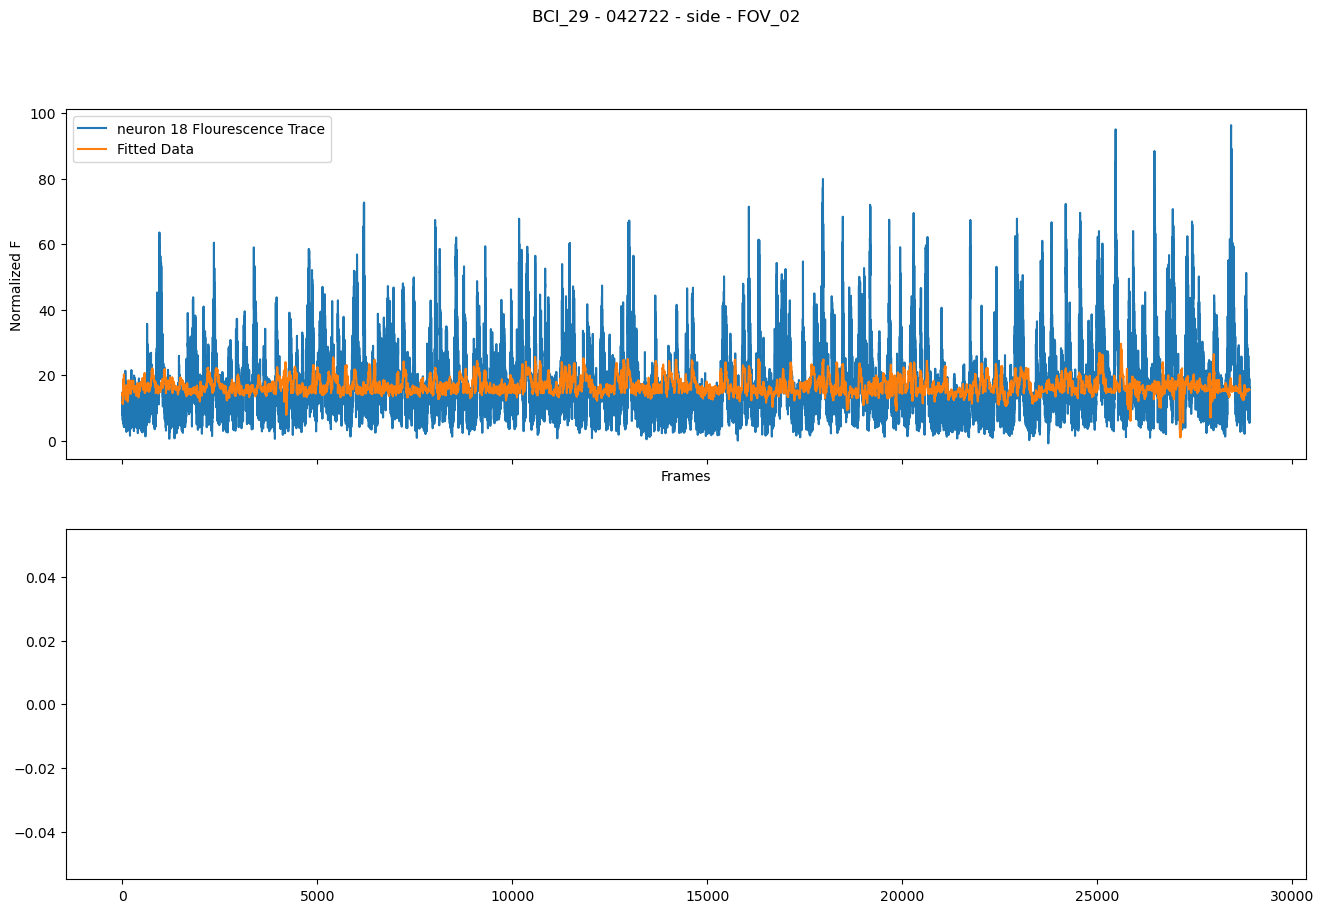

In [437]:
import matplotlib.pyplot as plt
cn = 18 #dict_aligned['cn']
def plot_regression(neuron=cn):
    _, axs = plt.subplots(2, 1, figsize=(16,10),sharex=True)
    plt.suptitle(f"{mouse} - {session} - {camera} - {FOV}")
    axs[0].plot(F[neuron, :], label=f'neuron {neuron} Flourescence Trace')
    axs[0].plot((beta[neuron]@DLC_aligned.T) + intercept[neuron], label='Fitted Data')
    #axs[0].plot(F[neuron, :]-((beta[neuron]@DLC_aligned.T) + intercept[neuron]),'k-', label='Difference')
    # ax[0,0].set_title(f'{end-start} timepoints, score {scores[cn]:0.2f}')
    axs[0].set_xlabel("Frames")
    axs[0].set_ylabel("Normalized F")
    axs[0].legend()
   # axs[0].set_xlim([0,10000])
    #axs[1].plot(DLC_aligned["Lickport"])
    plt.plot()
plot_regression(cn)

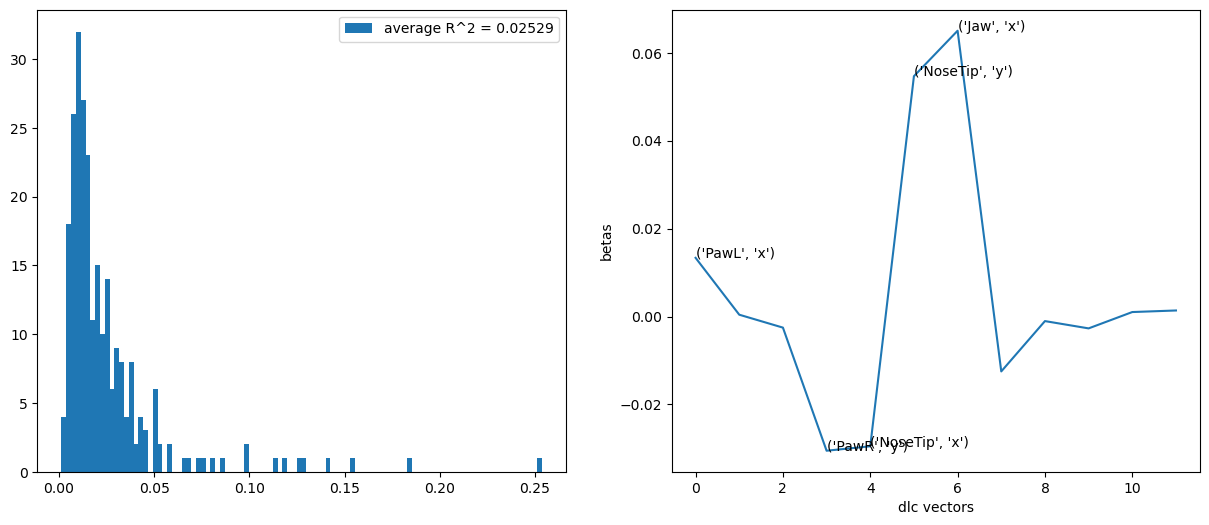

In [438]:
fig = plt.figure(figsize = [15,6])
ax_scores = fig.add_subplot(1,2,1)
ax_scores.hist(scores, bins=100, label=f'average R^2 = {np.mean(scores):0.5f}')
ax_scores.legend()
ax_beta_cn = fig.add_subplot(1,2,2)
ax_beta_cn.plot(beta[cn,:])
ax_beta_cn.set_xlabel('dlc vectors')
ax_beta_cn.set_ylabel('betas')
for i in np.argsort(np.abs(beta[cn,:]))[::-1][:5]:
    ax_beta_cn.text(i,beta[cn,i],DLC_aligned.keys()[i])
#plt.show

In [439]:
# offset in time
score_list = []
beta_list = []
offsets = np.arange(-55,55,5)
for offset in offsets:
    scores_, beta_, intercept_ = pipeline_regression.linear_regression(np.roll(F[cn:cn+1],offset,1), DLC_aligned)
    score_list.append(scores_[0])
    beta_list.append(beta_[0])
#plt.plot(offsets/20,score_list)

Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.10it/s]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 50.52it/s]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.93it/s]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 56.91it/s]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 56.29it/s]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.86it/s]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 57.20it/s]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 55.69it/s]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 55.40it/s]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.28it/s]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 57.18it/s]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 57.10it/s]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 57.06it/s]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 57.64it/s]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.50it/s]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.60it/s]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.41it/s]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 57.94it/s]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.74it/s]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.06it/s]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.45it/s]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.92it/s]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 85.05it/s]


Text(0.5, 1.0, 'betas at optimal offset')

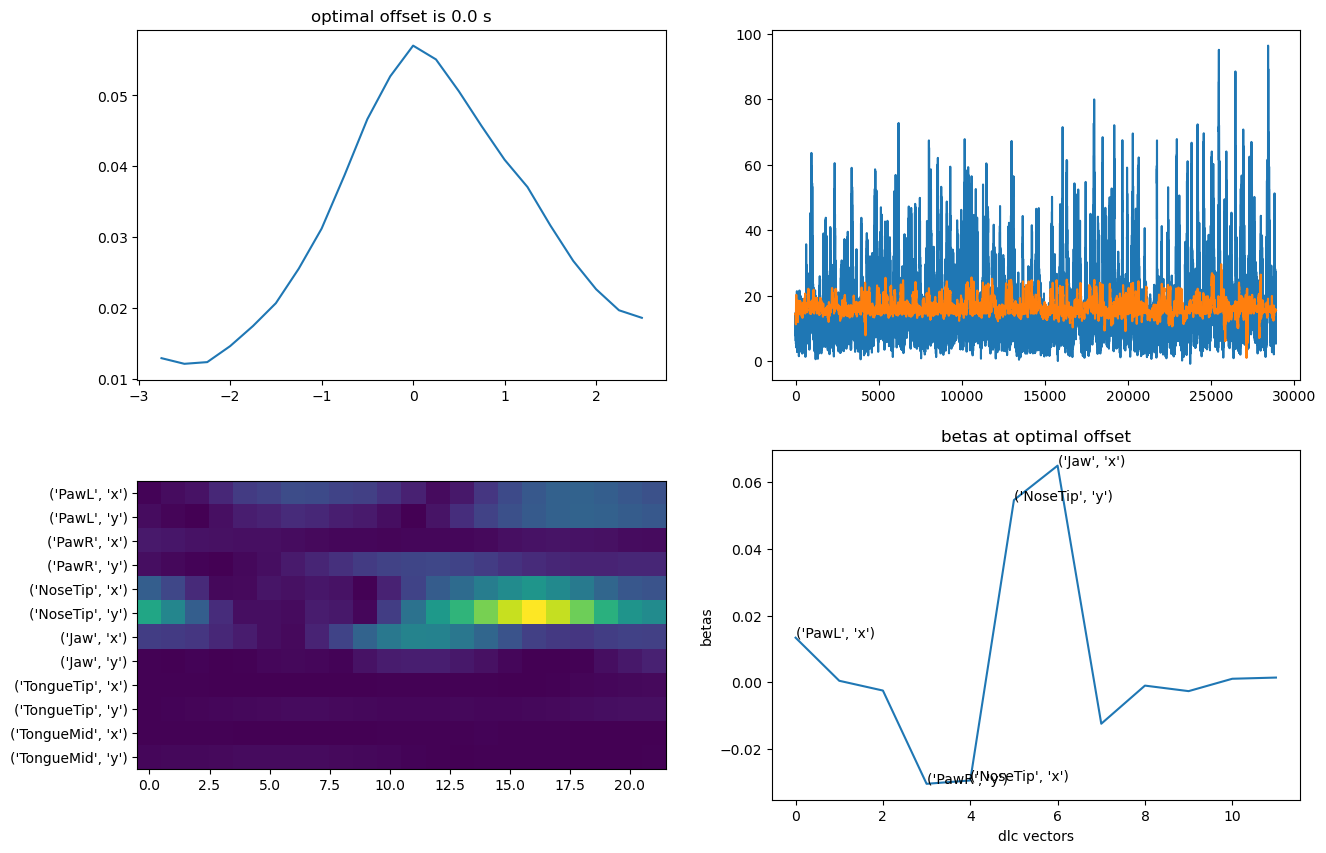

In [440]:
fig = plt.figure(figsize = [15,10])
ax1= fig.add_subplot(2,2,1)
ax2= fig.add_subplot(2,2,3)
ax1.plot(offsets/20,score_list)
ax1.set_title('optimal offset is {} s'.format(offsets[np.argmax(score_list)]/20))
beta_array = np.abs(np.asarray(beta_list).squeeze().T)
# beta_array = beta_array - np.min(beta_array,1)[:,np.newaxis]
# beta_array = beta_array / np.max(beta_array,1)[:,np.newaxis]
ax2.imshow(beta_array)
# ticks =np.arange(0,33,5)
# ax2.set_xticks(ticks)
# ax2.set_xticklabels(offsets[ticks]/20)
# ax2.set_xticklabels(offsets[ticks]/20)
ax2.set_yticks(np.arange(0,len(DLC_aligned.keys()),1))
ax2.set_yticklabels(DLC_aligned.keys())

ax3 = fig.add_subplot(2,2,2)
    
ax3.plot(F[cn, :], label=f'neuron {cn} Flourescence Trace')
scores_, beta_, intercept_ = pipeline_regression.linear_regression(np.roll(F[cn:cn+1],offsets[np.argmax(score_list)],1), DLC_aligned)
scores_ = scores_[0]
beta_ = beta_[0]
intercept_ = intercept_[0]
ax3.plot((beta_@DLC_aligned.T) + intercept_, label='Fitted Data')

ax_beta_cn = fig.add_subplot(2,2,4)
ax_beta_cn.plot(beta_)
ax_beta_cn.set_xlabel('dlc vectors')
ax_beta_cn.set_ylabel('betas')
for i in np.argsort(np.abs(beta_))[::-1][:5]:
    ax_beta_cn.text(i,beta_[i],DLC_aligned.keys()[i])
ax_beta_cn.set_title('betas at optimal offset')

In [149]:
# select neurons to predict based on their activity - e.g. exclude cells that have low activity, or include cells that have bit movement-triggered averages, and whatnot - Marton can do this

In [150]:
# predict the activity of the selected neurons from DLC data

# Comparison of day-to-day movements

In [184]:
# extract reward-triggered and go-cue triggered movements of a mouse for ALL sessions
import os
import importlib
importlib.reload(BCI_analysis.pipeline_align)
dlc_base_dir = os.path.abspath("../bucket/Data/Behavior_videos/DLC_output/Bergamo-2P-Photostim/")
bpod_path = os.path.abspath("../bucket/Data/Behavior/BCI_exported/Bergamo-2P-Photostim/")
suite2p_path = os.path.abspath("../bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/")
sessionwise_data_path = os.path.abspath("../bucket/Data/Calcium_imaging/sessionwise_tba/")
aligned_data_path = os.path.abspath("../bucket/Data/Calcium_imaging/data_aligned/")
plt_save_path = os.path.abspath("../Plots/")

mouse = "BCI_26"
FOV = "FOV_04"
camera = "side"
session = "041022"
dict_aligned = BCI_analysis.pipeline_align.get_aligned_data(suite2p_path, dlc_base_dir, bpod_path, 
                                                            sessionwise_data_path, aligned_data_path, 
                                                            mouse=mouse, FOV=FOV, camera=camera, 
                                                            session=session, sampling='down', overwrite=False)

# function1: dict_aligned should also have the moving standard deviation and then downsample it. (Paint)
#            Also make sure to have the flouroscence indices.        
# function2: align at some point

File found at /home/jupyter/BCI_analysis/bucket/Data/Calcium_imaging/data_aligned/BCI_26/041022-dict_aligned-downsampled.npy


dict_keys(['F_aligned', 'DLC_aligned', 'dff_aligned', 'lick_times_aligned', 'reward_times_aligned', 'trial_times_aligned', 'cn', 'trials_taken'])


Calculating regression fit for 887 neurons, May take time


100%|██████████| 887/887 [00:20<00:00, 43.11it/s]


In [ ]:
# train a classifier to predict the session ID based on the movements. Can we do it?

# classify single trials with many parameters, if we look at single movements its easier to do it. 
## to focus on sessions that the mouse mightve learnt with movements. 

# look at behavior after the reward vs before the reward. 
# look at trial to trial data. 

#
#
#      Speed (root(vx^2 + vy^2))
#     (moving standard devations)  ----> Random Forest ----> 
#         ------reward------
#
#

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

X = DLC_aligned
y = data['session ID']

clf = RandomForestClassifier()

# Fit the classifier to the data
clf.fit(X, y)
predictions = clf.predict(X)
print(predictions)

